# Loading data - dataset loaders

In [19]:
from sklearn.datasets import load_iris

In [20]:
iris_dataset = load_iris()

In [23]:
iris_dataset.data[1]

array([4.9, 3. , 1.4, 0.2])

# Loading data - dataset fetchers 

In [4]:
from sklearn.datasets.california_housing import fetch_california_housing

In [24]:
houses = fetch_california_housing()

In [25]:
print(houses.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

# Loading data – data generators 

In [7]:
from sklearn.datasets import make_regression
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)

In [26]:
X[1],y[1]

(array([-0.33967221]), -23.882915365059134)

#  openml.org repository for data

In [9]:
from sklearn.datasets import fetch_openml

In [27]:
mice = fetch_openml(name='miceprotein', version=4)

In [28]:
mice.data.shape

(1080, 77)

# Loading data – from CSV file

In [12]:
import pandas as pd
data = pd.read_csv('test.csv')

In [29]:
data.shape

(7, 3)

# Pre-processing data – Mean removal 

In [28]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

                                       


In [29]:
X_scaled = preprocessing.scale(X_train)

X_scaled   

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

# Scaled data has zero mean and unit variance:

In [30]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [31]:
X_scaled.std(axis=0)

array([1., 1., 1.])

# Pre-processing data – Non-linear transformation

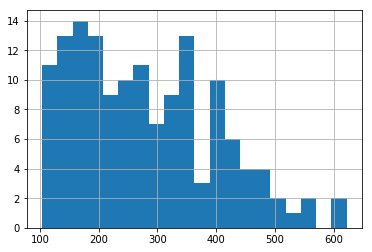

In [32]:
import pandas as pd
%matplotlib inline
df =pd.read_csv('international-airline-passengers.csv')
df['passengers'].hist(bins=20)

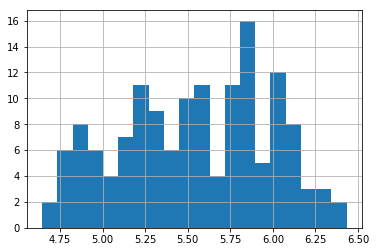

In [33]:
import numpy as np
df['passengers'] = np.log(df['passengers'])
df['passengers'].hist(bins=20)


# Pre-processing data – Normalization

In [34]:
# scaling individual samples to have unit normal
from sklearn import preprocessing
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')                              


In [35]:
X_normalized      

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

# Pre-processing data – Encoding

In [7]:
genders = ['male', 'female']
locations = ['Africa', 'Asia', 'Europe']
browsers = ['Chrome', 'Firefox', 'IE', 'Safari']
enc = preprocessing.OneHotEncoder(categories=[genders, locations, browsers])


In [36]:
X = [['male', 'Africa', 'Safari'], ['female', 'Europe', 'Firefox']]
enc.fit(X)
enc

OneHotEncoder(categorical_features=None,
       categories=[['male', 'female'], ['Africa', 'Asia', 'Europe'], ['Chrome', 'Firefox', 'IE', 'Safari']],
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [37]:
enc.transform(X).toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0.]])

# Pre-processing data – Discretization

In [38]:
#converting or partitioning continuous features to discretized intervals
import numpy as np
X = np.array([[ -4., 5., 12 ],
              [  1., 6., 14 ],
              [  6., 3., 11 ]])
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit(X)

In [39]:
est.transform(X)

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

# Pre-processing data – Imputation

In [43]:
import pandas as pd
from sklearn.impute import SimpleImputer
df = pd.DataFrame([["a", "x"],
                   [np.nan, "y"],
                   ["a", np.nan],
                   ["b", "y"]], dtype="category")
   

In [44]:
imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df))   
print(df)

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]
     0    1
0    a    x
1  NaN    y
2    a  NaN
3    b    y
